In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2025-04-28 12:27:26.263350: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 12:27:26.335815: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 12:27:26.399699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745843246.456970     165 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745843246.473688     165 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745843246.596356     165 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


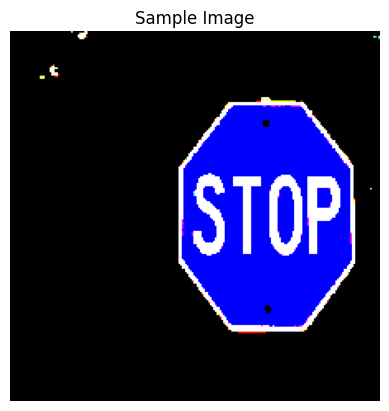

In [7]:
# Load preprocessed images and the corresponding labels
image, labels = np.load('data/batch.npy',allow_pickle=True).tolist()

# Define hyperparameters
INPUT_SIZE = image.shape[1]
NUM_CLASSES = labels['classifier_head'].shape[1]
DROPOUT_RATE = 0.2
EPOCHS = 20

#  Visualize a sample image
plt.imshow(image[2])
plt.title("Sample Image")
plt.axis("off")
plt.show()

In [8]:
# Build the CNN model
model = keras.Sequential([
    # Feature extractor
    layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)),
    layers.AveragePooling2D(pool_size=2, strides=2),
    
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.AveragePooling2D(pool_size=2, strides=2),
    
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.Dropout(DROPOUT_RATE),
    layers.AveragePooling2D(pool_size=2, strides=2),
    
    # Adapter
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    # Classifier head
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax', name='classifier_head')
])

/home/workbench/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-28 12:30:07.265596: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Train the model
history = model.fit(image, labels['classifier_head'], epochs=EPOCHS)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 3.9815
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5000 - loss: 232.2602
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5000 - loss: 50.5019
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5000 - loss: 15.9243
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5000 - loss: 3.3460
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5000 - loss: 11.0280
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.5833 - loss: 7.3901
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7500 - loss: 2.1723
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 1.0000 - loss: 0.0640
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.8333 - loss: 0.7374
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8333 - loss: 1.0367
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8333 - 

In [12]:
# Display final training accuracy
final_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_accuracy:.2%}")

Final Training Accuracy: 100.00%
